## Interpolating the data from adcps from one mooring one regular 2D time-depth grid and fill gaps in z-coordinates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import glob
import pandas as pd
import mplniw.utils as ut
import mplniw.sigp as sp
from datetime import timedelta, datetime
import mplniw.plot as pl

In [2]:
#directories
root_dir = '/Users/zcasparcohen/Documents/NISKINE/data/v1/'
data_dir = '/Users/zcasparcohen/codes/NIW/data/'
mooring = 3 #mooring id

In [3]:
listfile = sorted(filter(os.path.isfile,glob.glob(root_dir+'M%s_*'%mooring))) #list of files corresponding to the mooring
arraylist = {'%s'%file.split('_')[1][:-3]:xr.open_dataset(file) for file in listfile} #creating in dict with all the files
dt = 10 # time step in minutes
t_new = pd.date_range(start='2019-05-17T16', end='2020-10-06T00', freq=timedelta(minutes=dt))  # new time grid
z_new = np.arange(0,2000,16) # new depth grid
minDT = 60  # minimal time length for adcp

In [4]:
ds,ds_fill = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'slinear','max_gap':150}) #linear interpolation on new grid
ds_cubic,ds_fill_cubic = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'cubic','max_gap':150}) #cubic interpolation on new grid

### Comparing interpolation methods

(1400.0, 0.0)

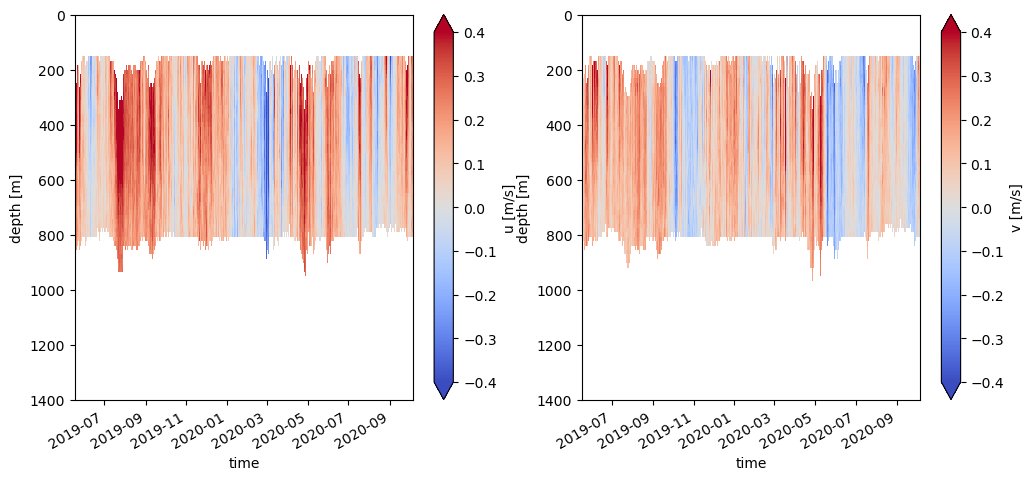

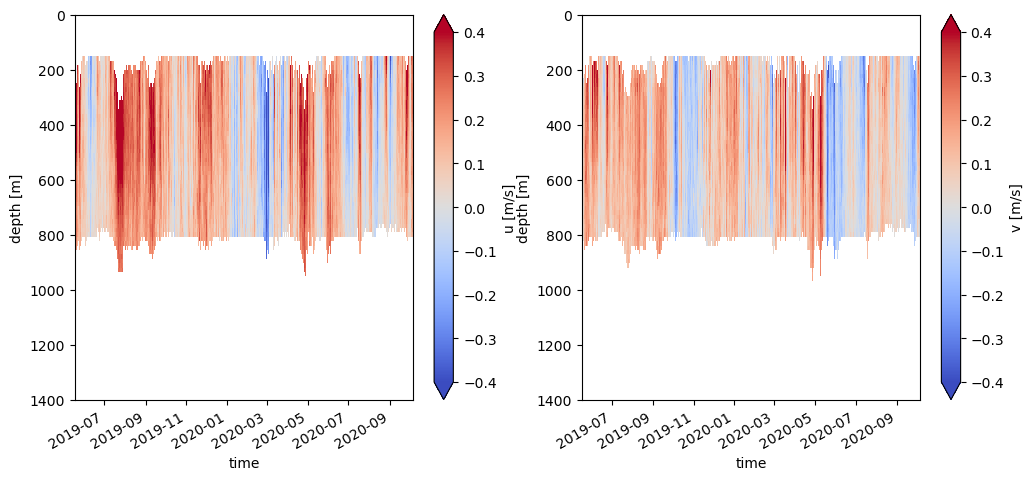

In [9]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
pl.plot_uv(ds_fill,'u',fig,ax)
ax.set_ylim(1400,0)
ax = fig.add_subplot(122)
pl.plot_uv(ds_fill,'v',fig,ax)
ax.set_ylim(1400,0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
pl.plot_uv(ds_fill_cubic,'u',fig,ax)
ax.set_ylim(1400,0)
ax = fig.add_subplot(122)
pl.plot_uv(ds_fill_cubic,'v',fig,ax)
ax.set_ylim(1400,0)

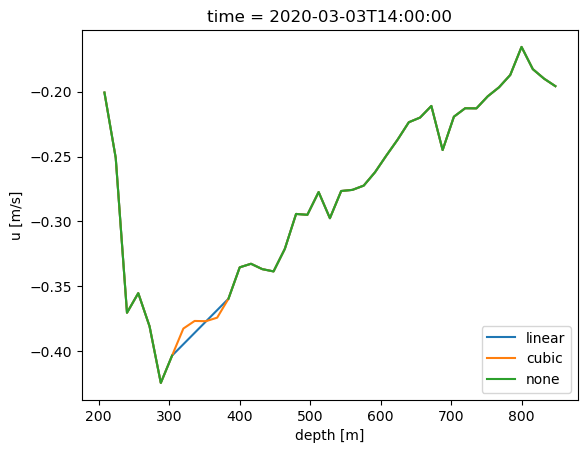

In [40]:
#Example of filling
t = '2020-03-03T14:00'
ds_fill.u.sel(time=t).plot(label='linear')
ds_fill_cubic.u.sel(time=t).plot(label='cubic')
ds.u.sel(time=t).plot(label='none')
plt.legend()

In [20]:
# Save files
ds_fill.to_netcdf(data_dir+'M%s_linear_merge_slinearfill.nc'%mooring,'w')
#ds_fill_quad.to_netcdf(data_dir+'M%s_linear_merge_quadracticfill.nc'%mooring,'w')
ds_fill_cubic.to_netcdf(data_dir+'M%s_linear_merge_cubicfill.nc'%mooring,'w')